In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np

import glob
from tqdm import tqdm 

import sys
sys.path.append('../src')

import utils

# Read the Annotation Files

In [2]:
!chdir

H:\My Drive\Projects\yolo-segmentation-tool\notebooks


In [3]:
dataset_PATH = "../data/example_dataset_1_YOLO/"

In [4]:
def draw_annotations(label_PATH, image, thickness=2):
    """ Draw instance segmentation from given label_PATH and given image

    #TODO: 
        - give different color for every class
    
    Args:
        label_PATH: annotation label_PATH
        image: given image to draw annotations
        thickness: line thickness        
    Returns:
        image: annotated image
    """
    color = (255, 255, 0)  # Green color
    
    
    img_height, img_width, _ = image.shape
    
    # read the annotation file - Parse the YOLO annotation file
    with open(label_PATH, "r") as file:
        lines = file.readlines()
    
    for line in lines:
        data = line.strip().split()
        
        class_id = int(data[0])
        points = list(map(float, data[1:]))
        
        # split x and y. Also scale for image width and height
        x = np.array(points[0::2])*img_width
        y = np.array(points[1::2])*img_height
        
        # merge x and y as a points 
        points = np.array(list(zip(x, y))).astype(int)
        
        # draw segmentations
        image = cv2.drawContours(image, [points], -1, color, thickness)

    return image

Processing in train...


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

image_PATH:  ../data/example_dataset_1_YOLO//train//images\vertical_1.jpg
image_name:  vertical_1.jpg
label_PATH:  ../data/example_dataset_1_YOLO//train//labels/vertical_1.txt


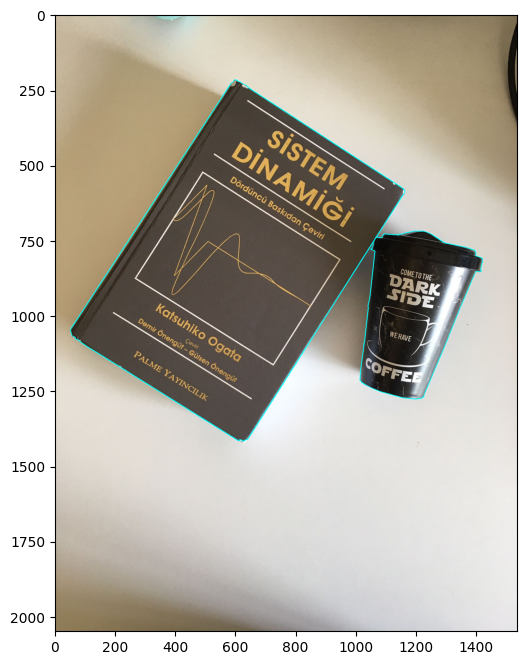

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.60it/s]

image_PATH:  ../data/example_dataset_1_YOLO//train//images\vertical_2.jpg
image_name:  vertical_2.jpg
label_PATH:  ../data/example_dataset_1_YOLO//train//labels/vertical_2.txt


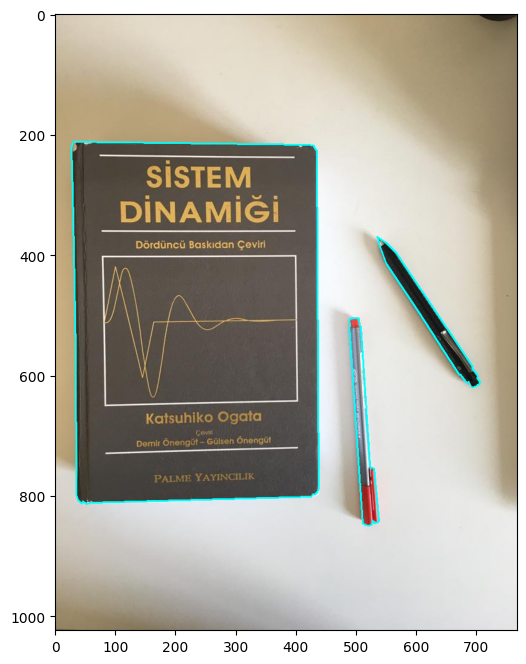

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.14it/s]


Processing in test...


0it [00:00, ?it/s]


Processing in val...


0it [00:00, ?it/s]


In [5]:
# reading annotations from files and draw o image

# find all images and annotations in the train, test, and val folders if they exists
for folder in glob.glob(dataset_PATH+"/*/"):
    folder_name = folder.split("\\")[-2]    # it suppose to be train, test, val
    print(f"Processing in {folder_name}...")
    
    sub_folder_PATH = f"{dataset_PATH}/{folder_name}/"    #  PATH of train, test, val
    
    # sub_folders_names = ["images", "labels"]
    
    for image_PATH in tqdm(glob.glob(sub_folder_PATH+"/images/*")):
        image_name = image_PATH.split("\\")[-1]
        label_PATH = f"{sub_folder_PATH}/labels/{image_name.split('.')[0]}.txt"
        
        print("image_PATH: ", image_PATH)
        print("image_name: ", image_name)
        print("label_PATH: ", label_PATH)
        
        image = cv2.imread(image_PATH)
        
        image = draw_annotations(label_PATH, image)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

# Use `draw_annotations` from Library

Processing in train...


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

image_PATH:  ../data/example_dataset_1_YOLO//train//images\vertical_1.jpg
image_name:  vertical_1.jpg
label_PATH:  ../data/example_dataset_1_YOLO//train//labels/vertical_1.txt


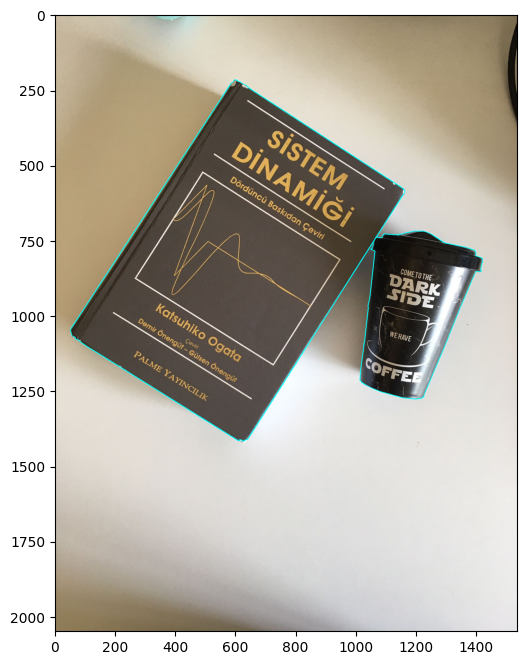

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.71it/s]

image_PATH:  ../data/example_dataset_1_YOLO//train//images\vertical_2.jpg
image_name:  vertical_2.jpg
label_PATH:  ../data/example_dataset_1_YOLO//train//labels/vertical_2.txt


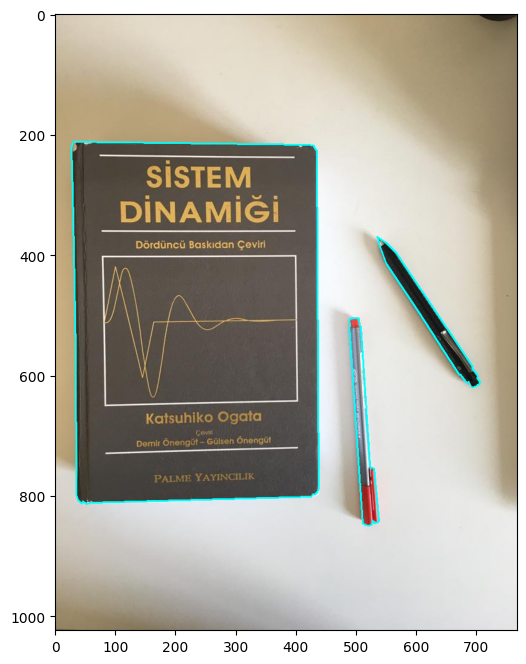

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.17it/s]


Processing in test...


0it [00:00, ?it/s]


Processing in val...


0it [00:00, ?it/s]


In [6]:
# reading annotations from files and draw o image

# find all images and annotations in the train, test, and val folders if they exists
for folder in glob.glob(dataset_PATH+"/*/"):
    folder_name = folder.split("\\")[-2]    # it suppose to be train, test, val
    print(f"Processing in {folder_name}...")
    
    sub_folder_PATH = f"{dataset_PATH}/{folder_name}/"    #  PATH of train, test, val
    
    # sub_folders_names = ["images", "labels"]
    
    for image_PATH in tqdm(glob.glob(sub_folder_PATH+"/images/*")):
        image_name = image_PATH.split("\\")[-1]
        label_PATH = f"{sub_folder_PATH}/labels/{image_name.split('.')[0]}.txt"
        
        print("image_PATH: ", image_PATH)
        print("image_name: ", image_name)
        print("label_PATH: ", label_PATH)
        
        image = cv2.imread(image_PATH)
        
        image = utils.draw_annotations(label_PATH, image)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()